# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
import pandas as pd
import numpy as np
import json

In [6]:
tarc_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
tarc_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
import requests 
import os

In [5]:

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [7]:
image_prediction_df = pd.read_csv('image-predictions.tsv', sep= '\t', header=0)
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
import tweepy

consumer_key = 'fitavIQl1ORg0aIiQKV4aDdnK'
consumer_secret = 'DZfwS2aditIL129bjSNbk7VdIBpJDU8jEsfaqEKGLifUAUY5z9'
access_token = '386791930-AzYo8ucSQATQsqs1r3grWWrBVhf3eAt0n6AxkuLl'
access_secret = 'EiKC1A5vwWP9BKXatBx2iRm46m2tyKSGy2dpvdQh9QkfV'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [8]:

tweet_id_list = tarc_df['tweet_id']


In [9]:
tweet_id_list.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

In [10]:
list_of_tweets = []
list_of_missing_tweets = []
for tweet_id in tweet_id_list:
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        list_of_missing_tweets.append(tweet_id)
       

Rate limit reached. Sleeping for: 746
Rate limit reached. Sleeping for: 742


In [11]:
tweet_dict = []
for tweet in list_of_tweets:
    tweet_dict.append(tweet)
    

In [14]:
with open('tweet_json.txt', 'w') as file:
    file.write(json.dumps(tweet_dict, indent = 4))



In [8]:
with open('tweet_json.txt', 'r') as json_file:
    data = json.load(json_file)
   
    

In [9]:
retweet_count_list = []
for info in data:
    retweet_count_list.append({'tweet_id': info['id'],
                        'retweet_count': info['retweet_count'],
                        'favorite_count': info['favorite_count']})
retweet_count_list 

[{'tweet_id': 892420643555336193,
  'retweet_count': 6876,
  'favorite_count': 32879},
 {'tweet_id': 892177421306343426,
  'retweet_count': 5178,
  'favorite_count': 28413},
 {'tweet_id': 891815181378084864,
  'retweet_count': 3421,
  'favorite_count': 21361},
 {'tweet_id': 891689557279858688,
  'retweet_count': 7085,
  'favorite_count': 35856},
 {'tweet_id': 891327558926688256,
  'retweet_count': 7595,
  'favorite_count': 34302},
 {'tweet_id': 891087950875897856,
  'retweet_count': 2548,
  'favorite_count': 17255},
 {'tweet_id': 890971913173991426,
  'retweet_count': 1620,
  'favorite_count': 10070},
 {'tweet_id': 890729181411237888,
  'retweet_count': 15443,
  'favorite_count': 55314},
 {'tweet_id': 890609185150312448,
  'retweet_count': 3556,
  'favorite_count': 23806},
 {'tweet_id': 890240255349198849,
  'retweet_count': 5984,
  'favorite_count': 27137},
 {'tweet_id': 890006608113172480,
  'retweet_count': 6030,
  'favorite_count': 26274},
 {'tweet_id': 889880896479866881,
  'retwe

In [10]:
retweet_count_df = pd.DataFrame(retweet_count_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
retweet_count_df.sample(10)

,tweet_id,retweet_count,favorite_count
942,750086836815486976,481,1973
97,872820683541237760,3101,12705
1433,694669722378485760,12816,32180
456,816014286006976512,4793,0
686,785264754247995392,1492,6741
760,775350846108426240,3552,9321
150,861005113778896900,3265,14542
85,875144289856114688,4081,18865
853,760539183865880579,3265,6901
883,757596066325864448,939,3972


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
#Just by taking a brief initial look throuh some of the rows in this dataframe I can see some quality issues. 
#For example, some of the dog names are "a" or "an" or "the", which is clearly an error since those are not names.
tarc_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
#Since we want to only inlclude original tweets, we can delete tweets that are retweets or replies and then remove any unnecessary columns. 
#The timestamp column should not be an object it should be a datetime.
tarc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#These values for the source column are too long, they can be shortened. 
tarc_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [ ]:
tarc_df.sample(20)

In [ ]:
tarc_df.tweet_id.duplicated().sum()

In [ ]:
tarc_df_10 = tarc_df.query('rating_denominator == 10')
tarc_df_10.rating_numerator.value_counts()

In [ ]:
#Seems like there is a picture of rapper Snoop Dogg.
tarc_df[tarc_df['rating_numerator'] == 420]

In [ ]:
tarc_df[tarc_df['rating_numerator'] == 27]

In [ ]:
tarc_df[tarc_df['rating_denominator'] != 10]

In [ ]:
#There are many instances of tweets having both pupper and doggo values
pupper_df = tarc_df.query('pupper != "None" & doggo != "None"')
pupper_df

In [ ]:
#No stage is given for Dido
pupper_df.loc[460].text

In [ ]:
#Bones is a pupper
pupper_df.loc[575].text

In [ ]:
#Is not a picture of a dog.
pupper_df.loc[956].text

In [18]:
#I don't see any quality issues with this dataframe, but I do think it should be joined with the twitter arhive dataframe.
retweet_count_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6876,32879
1,892177421306343426,5178,28413
2,891815181378084864,3421,21361
3,891689557279858688,7085,35856
4,891327558926688256,7595,34302
5,891087950875897856,2548,17255
6,890971913173991426,1620,10070
7,890729181411237888,15443,55314
8,890609185150312448,3556,23806
9,890240255349198849,5984,27137


In [19]:
retweet_count_df.retweet_count.max()

69397

In [67]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_prediction_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [72]:
image_prediction_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
teddy                         18
Maltese_dog                   18
Shetland_sheepdog             18
beagle                        18
Eskimo_dog                    18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [51]:
s = image_prediction_df.jpg_url.duplicated()
image_prediction_df[s].tweet_id

1297    752309394570878976
1315    754874841593970688
1333    757729163776290825
1345    759159934323924993
1349    759566828574212096
1364    761371037149827077
1368    761750502866649088
1387    766078092750233600
1407    770093767776997377
1417    771171053431250945
1427    772615324260794368
1446    775898661951791106
1453    776819012571455488
1456    777641927919427584
1463    778396591732486144
1476    780496263422808064
1487    782021823840026624
1495    783347506784731136
1510    786036967502913536
1522    788070120937619456
1538    790723298204217344
1541    791026214425268224
1564    793614319594401792
1569    794355576146903043
1571    794983741416415232
1579    796177847564038144
1588    798340744599797760
1589    798628517273620480
1590    798644042770751489
1591    798665375516884993
               ...        
1619    802624713319034886
1624    803692223237865472
1627    804413760345620481
1634    805958939288408065
1636    806242860592926720
1640    807059379405148160
1

In [43]:
image_prediction_df[image_prediction_df['jpg_url'] == 'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


In [20]:
image_error_df = image_prediction_df.query('p2_conf < p3_conf')
image_error_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [21]:
image_prediction_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
384,673343217010679808,https://pbs.twimg.com/media/CVgyFSyU4AA9p1e.jpg,1,Chihuahua,0.541408,True,Italian_greyhound,0.156891,True,miniature_pinscher,0.069556,True
378,673240798075449344,https://pbs.twimg.com/media/CVfU7KLXAAAAgIa.jpg,1,Airedale,0.443004,True,brown_bear,0.114162,False,Chesapeake_Bay_retriever,0.094639,True
756,688519176466644993,https://pbs.twimg.com/media/CY4ciRFUMAAovos.jpg,1,Pembroke,0.696372,True,Cardigan,0.121052,True,Shetland_sheepdog,0.050592,True
1953,863907417377173506,https://pbs.twimg.com/media/C_03NPeUQAAgrMl.jpg,1,marmot,0.358828,False,meerkat,0.174703,False,weasel,0.123485,False
1385,766008592277377025,https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg,1,Welsh_springer_spaniel,0.728153,True,basset,0.103842,True,Brittany_spaniel,0.062414,True
1759,825829644528148480,https://pbs.twimg.com/media/C3XvqILXUAU2nnT.jpg,2,Great_Pyrenees,0.853407,True,golden_retriever,0.053531,True,English_setter,0.045830,True
119,668171859951755264,https://pbs.twimg.com/media/CUXSwy8W4AA6uet.jpg,1,Chihuahua,0.664834,True,cowboy_boot,0.060343,False,giant_panda,0.059838,False
840,694669722378485760,https://pbs.twimg.com/media/CaP2bS8WYAAsMdx.jpg,2,beaver,0.457094,False,mongoose,0.228298,False,marmot,0.148309,False
526,676613908052996102,https://pbs.twimg.com/media/CWPQwmJWUAAu_At.jpg,1,book_jacket,0.493790,False,Doberman,0.096423,True,miniature_pinscher,0.070647,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True


### Quality issues
1.There are retweeted tweets and reply tweets in the twitter archive df. We only want to include original tweets.   

2.In the twitter arhcive datafram (tarc_df), the timestamp column is an object when it should be a datetime.

3.There are 23 entries where the rating denominator is not 10, which it always should be. 

4.Among tweets with a correct denominator of 10 there are several rows that have numerators that do not make sense, such as 182 and 27. 

5.Some rows in the twitter archive dataframe contain multiple dog stages for a single dog. This must be fixed.

6.There are some dog names that are not correct. 

7.The 'Source' column in the twitter archive dataframe contains strings that can be shortened so that they are more easily read and understood.

8.Some dog breeds are capitalized in P1, P2, P3 columns, others are not. This is a consistency isssue.


### Tidiness issues
1. In the twitter archive df, there are four columns for dog nickname, "doggo" floofer" "pupper" "puppo". Since dog nickname represents a varaible, it should be its own column and the nicknames should be values in that column. Each variable forms a column. Each observation forms a row. Each type of observational unit forms a table. 

2. There is no need for a seperate retweet/favorite count dataframe. This can be joined with the twitter archive dataframe. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [11]:
# Make copies of original pieces of data
tarc_df_clean = tarc_df.copy()
image_prediction_df_clean = image_prediction_df.copy()
retweet_count_df_clean = retweet_count_df.copy()

## Quality Issues

### Issue #1:

#### Define: The data twitter archive data (tarc_df) includes retweets and replies. We only want to have normal tweets in our dataframe.

#### Code

In [12]:
not_null_reply = tarc_df_clean.in_reply_to_status_id.notnull()
tarc_df_clean.drop(index = tarc_df_clean[not_null_reply].index, inplace = True)

In [13]:
not_null_retweet = tarc_df_clean.retweeted_status_id.notnull()
tarc_df_clean.drop(index = tarc_df_clean[not_null_retweet].index, inplace = True)

#### Test

In [14]:
#Make sure deletion worked
tarc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### Define We now must delete the following columns in the twitter archive dataframe: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

#### Code

In [15]:
tarc_df_clean.drop(labels = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [16]:
tarc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #2

#### Define: The timestamp column in the twitter archive dataframe should be a datetime. 

In [17]:
tarc_df_clean.timestamp = tarc_df_clean.timestamp.str[:-6]
tarc_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
tarc_df_clean.timestamp = pd.to_datetime(tarc_df_clean.timestamp)

#### Test

In [19]:
tarc_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #3:

#### Define: There are 17 entries where the rating denominator is not 10, which it always should be. It is too cumbersome to examine each row in detail to see what is wrong so I am going to drop these rows from the dataframe.

In [20]:
tarc_df_clean[tarc_df_clean['rating_denominator'] != 10].index

Int64Index([ 433,  516,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351,
            1433, 1635, 1662, 1779, 1843, 2335],
           dtype='int64')

#### Code

In [21]:
tarc_df_clean.drop(index = tarc_df_clean[tarc_df_clean['rating_denominator'] != 10].index, inplace=True)

#### Test

In [22]:
tarc_df_clean[tarc_df_clean['rating_denominator'] != 10].index

Int64Index([], dtype='int64')

### Issue #4

#### Define: There are also 5 numerator values (75, 420, 26, 27, 1776) that do not make sense in the context of a typical rating, so we are also going to drop these rows from the dataframe. 

In [23]:
tarc_df_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       152
8        98
7        51
14       38
5        34
6        32
3        19
4        15
2         9
1         4
75        1
420       1
26        1
27        1
1776      1
0         1
Name: rating_numerator, dtype: int64

#### Code

In [24]:
tarc_df_clean.query('rating_numerator > 20').index
tarc_df_clean.drop(index = tarc_df_clean.query('rating_numerator > 20').index, inplace=True)


#### Test

In [25]:
tarc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2075 non-null int64
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2072 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-null object
puppo                 2075 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 210.7+ KB


### Issue #5

#### Define: There are some rows in the twitter archive dataframe that multiple dog stage values. I investigated in the section above and found that the words pupper and doggo were both mentioned in the same tweet. I will correct the error

In [26]:
tarc_df_clean.loc[460].text

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

In [27]:
tarc_df_clean.loc[575].text

"This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj"

In [28]:
tarc_df_clean.loc[705].text

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

In [29]:
tarc_df_clean.loc[956].text

"Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8"

#### Code

In [30]:
tarc_df_clean.loc[460, 'doggo'] = "None"

In [31]:
tarc_df_clean.loc[575, 'doggo'] = "None"

In [32]:
tarc_df_clean.loc[705, 'pupper'] = "None"

In [33]:
#This does not seem like it's a dog. We will drop.
tarc_df_clean.drop(index = tarc_df_clean[tarc_df_clean['tweet_id'] == 751583847268179968].index, inplace=True)

#### Test

In [34]:
tarc_df_clean.loc[705].pupper

'None'

In [35]:
tarc_df_clean.loc[460].doggo

'None'

In [36]:
tarc_df_clean.loc[575].doggo

'None'

In [37]:
tarc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2074 non-null int64
timestamp             2074 non-null datetime64[ns]
source                2074 non-null object
text                  2074 non-null object
expanded_urls         2071 non-null object
rating_numerator      2074 non-null int64
rating_denominator    2074 non-null int64
name                  2074 non-null object
doggo                 2074 non-null object
floofer               2074 non-null object
pupper                2074 non-null object
puppo                 2074 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 290.6+ KB


### Issue #6

#### Define: There are erroneous names in the twitter archive dataframe. These names include "a", "an", and "the". I will replace these names with "None". 

#### Code:

In [38]:
error_names = ['a', 'an', 'the']
def fix_names(tweet):
    if tweet['name'] in error_names:
        new_val = "None"
        return new_val
    else:
        return tweet['name']
tarc_df_clean['name'] = tarc_df_clean.apply(fix_names, axis=1)

#### Test

In [39]:
tarc_df_clean.name.value_counts()

None         656
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Lola           8
Toby           7
Daisy          7
Oscar          6
Stanley        6
Bailey         6
Koda           6
Bella          6
Jax            6
Bo             6
Chester        5
Rusty          5
Scout          5
Louis          5
Milo           5
Leo            5
Buddy          5
Bentley        5
Dave           5
Sammy          4
Dexter         4
            ... 
Bauer          1
Samsom         1
O              1
Meyer          1
Iroh           1
Emmy           1
Gidget         1
Pete           1
Jangle         1
Mutt           1
Cedrick        1
Harvey         1
Saydee         1
Lili           1
Jiminus        1
Billl          1
Shikha         1
Holly          1
Shnuggles      1
Dug            1
Mabel          1
Alejandro      1
Jay            1
Aiden          1
Kenzie         1
Smiley         1
Mauve          1
Lolo          

### Issue #7

#### Define: The 'Source' column in the twitter archive dataframe contains strings that can be shortened so that they are more easily read and understood.

#### Code

In [40]:
source_shorten_dict = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter Iphone',
                '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine',
                '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web',
                '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'}
def shorten_source(tweet):
    if tweet['source'] in source_shorten_dict.keys():
        shorten = source_shorten_dict[tweet['source']]
        return shorten
tarc_df_clean['source'] = tarc_df_clean.apply(shorten_source, axis=1)

#### Test

In [41]:
tarc_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter Iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter Iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter Iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter Iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter Iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #8

### Define: Some names are capitalized some are not. We are going to capitalize each dog name in the image prediction dataframe for consistency.

#### Code

In [42]:
image_prediction_df_clean['p1'] = image_prediction_df_clean.p1.str.capitalize()
image_prediction_df_clean['p2'] = image_prediction_df_clean.p2.str.capitalize()
image_prediction_df_clean['p3'] = image_prediction_df_clean.p3.str.capitalize()

#### Test

In [43]:
image_prediction_df_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1070,716285507865542656,https://pbs.twimg.com/media/CfDB3aJXEAAEZNv.jpg,1,Yorkshire_terrier,0.430420,True,Silky_terrier,0.196769,True,Cairn,0.072676,True
1420,771770456517009408,https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg,1,Papillon,0.533180,True,Collie,0.192031,True,Border_collie,0.121626,True
90,667538891197542400,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1,Yorkshire_terrier,0.618957,True,Silky_terrier,0.300313,True,Australian_terrier,0.053412,True
450,674739953134403584,https://pbs.twimg.com/media/CV0oaHFW4AA9Coi.jpg,1,Dandie_dinmont,0.175915,True,Black-footed_ferret,0.096534,False,Toy_poodle,0.064145,True
1472,779834332596887552,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,1,Golden_retriever,0.993830,True,Cocker_spaniel,0.003143,True,Great_pyrenees,0.000917,True
256,670764103623966721,https://pbs.twimg.com/media/CU8IY0pWIAA2AJ-.jpg,1,Norfolk_terrier,0.172850,True,Golden_retriever,0.072702,True,Television,0.037494,False
768,689280876073582592,https://pbs.twimg.com/media/CZDRTAPUoAEaqxF.jpg,3,Chihuahua,0.637546,True,American_staffordshire_terrier,0.150694,True,Staffordshire_bullterrier,0.103953,True
116,668113020489474048,https://pbs.twimg.com/media/CUWdPsqWcAERQVv.jpg,1,Pembroke,0.548896,True,Cardigan,0.191101,True,Collie,0.059814,True
1616,802265048156610565,https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,1,Labrador_retriever,0.897162,True,Beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True
375,672997845381865473,https://pbs.twimg.com/media/CVb39_1XIAAMoIv.jpg,1,Chow,0.517255,True,Pomeranian,0.206053,True,Koala,0.127037,False


## Tidiness Issues

### Issue #1

#### Define: In the twitter archive df, there are four columns for dog nickname, "doggo" floofer" "pupper" "puppo". Since dog nickname represents a variable, it should be its own column and the nicknames should be values in that column. Each variable forms a column. Each observation forms a row. Each type of observational unit forms a table. 

#### Code

In [44]:
tarc_df_clean = pd.melt(tarc_df_clean, id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], var_name = 'Dog', value_name = 'Dog_Stage')

In [45]:
tarc_df_clean.drop('Dog', 1, inplace=True)

In [46]:
tarc_df_clean.sort_values('Dog_Stage').tail(282)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_Stage
678,760521673607086080,2016-08-02 17:04:31,Vine,Doggo want what doggo cannot have. Temptation ...,https://vine.co/v/5ApKetxzmTB,12,10,None,doggo
161,854010172552949760,2017-04-17 16:34:26,Twitter Iphone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo
829,742534281772302336,2016-06-14 01:49:03,Vine,"For anyone who's wondering, this is what happe...",https://vine.co/v/iLTZmtE1FTB,11,10,None,doggo
674,760893934457552897,2016-08-03 17:43:45,Twitter Iphone,This is Wishes. He has the day off. Daily stru...,https://twitter.com/dog_rates/status/760893934...,11,10,Wishes,doggo
685,759793422261743616,2016-07-31 16:50:42,Twitter Iphone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo
889,733109485275860992,2016-05-19 01:38:16,Twitter Iphone,"Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo
879,735256018284875776,2016-05-24 23:47:49,Twitter Iphone,This is Kellogg. He accidentally opened the fr...,https://twitter.com/dog_rates/status/735256018...,8,10,Kellogg,doggo
143,858843525470990336,2017-05-01 00:40:27,Twitter Iphone,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo
308,826204788643753985,2017-01-30 23:05:46,Twitter Iphone,"Here's a little more info on Dew, your favorit...",http://us.blastingnews.com/news/2017/01/kentuc...,13,10,None,doggo
893,732375214819057664,2016-05-17 01:00:32,Twitter Iphone,This is Kyle (pronounced 'Mitch'). He strives ...,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo


In [47]:
#This code will make sure that the duplicates that we drop are the "None" values.
tarc_df_clean = tarc_df_clean.sort_values('Dog_Stage').drop_duplicates(subset='tweet_id', keep='last')

#### Test

In [48]:
tarc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 1997 to 7048
Data columns (total 9 columns):
tweet_id              2074 non-null int64
timestamp             2074 non-null datetime64[ns]
source                2074 non-null object
text                  2074 non-null object
expanded_urls         2071 non-null object
rating_numerator      2074 non-null int64
rating_denominator    2074 non-null int64
name                  2074 non-null object
Dog_Stage             2074 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 162.0+ KB


In [49]:
tarc_df_clean.Dog_Stage.value_counts()

None       1740
pupper      227
doggo        73
puppo        24
floofer      10
Name: Dog_Stage, dtype: int64

### Issue #2

#### Define: The retweet and favorite count dataframe and the image prediciton dataframe can be joined with the twitter archive dataframe. This is because it is the same observational unit, the tweet.

#### Code:

In [50]:
tarc_df_clean = pd.merge(tarc_df_clean, retweet_count_df_clean, on = ['tweet_id'], how = 'left')

#### Test:

In [51]:
tarc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id              2074 non-null int64
timestamp             2074 non-null datetime64[ns]
source                2074 non-null object
text                  2074 non-null object
expanded_urls         2071 non-null object
rating_numerator      2074 non-null int64
rating_denominator    2074 non-null int64
name                  2074 non-null object
Dog_Stage             2074 non-null object
retweet_count         2066 non-null float64
favorite_count        2066 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 194.4+ KB


#### Code:

In [52]:
tarc_df_clean = pd.merge(tarc_df_clean, image_prediction_df_clean, on = ['tweet_id'], how = 'left')

#### Test:

In [53]:
tarc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2073
Data columns (total 22 columns):
tweet_id              2074 non-null int64
timestamp             2074 non-null datetime64[ns]
source                2074 non-null object
text                  2074 non-null object
expanded_urls         2071 non-null object
rating_numerator      2074 non-null int64
rating_denominator    2074 non-null int64
name                  2074 non-null object
Dog_Stage             2074 non-null object
retweet_count         2066 non-null float64
favorite_count        2066 non-null float64
jpg_url               1948 non-null object
img_num               1948 non-null float64
p1                    1948 non-null object
p1_conf               1948 non-null float64
p1_dog                1948 non-null object
p2                    1948 non-null object
p2_conf               1948 non-null float64
p2_dog                1948 non-null object
p3                    1948 non-null object
p3_conf               1

In [54]:
#Drop rows where there is no image prediction
tarc_df_clean = tarc_df_clean[tarc_df_clean['p1'].notna()]

In [55]:
tarc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 2073
Data columns (total 22 columns):
tweet_id              1948 non-null int64
timestamp             1948 non-null datetime64[ns]
source                1948 non-null object
text                  1948 non-null object
expanded_urls         1948 non-null object
rating_numerator      1948 non-null int64
rating_denominator    1948 non-null int64
name                  1948 non-null object
Dog_Stage             1948 non-null object
retweet_count         1940 non-null float64
favorite_count        1940 non-null float64
jpg_url               1948 non-null object
img_num               1948 non-null float64
p1                    1948 non-null object
p1_conf               1948 non-null float64
p1_dog                1948 non-null object
p2                    1948 non-null object
p2_conf               1948 non-null float64
p2_dog                1948 non-null object
p3                    1948 non-null object
p3_conf               1

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [56]:
tarc_df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [57]:
df = pd.read_csv('twitter_archive_master.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948 entries, 0 to 1947
Data columns (total 22 columns):
tweet_id              1948 non-null int64
timestamp             1948 non-null object
source                1948 non-null object
text                  1948 non-null object
expanded_urls         1948 non-null object
rating_numerator      1948 non-null int64
rating_denominator    1948 non-null int64
name                  1948 non-null object
Dog_Stage             1948 non-null object
retweet_count         1940 non-null float64
favorite_count        1940 non-null float64
jpg_url               1948 non-null object
img_num               1948 non-null float64
p1                    1948 non-null object
p1_conf               1948 non-null float64
p1_dog                1948 non-null bool
p2                    1948 non-null object
p2_conf               1948 non-null float64
p2_dog                1948 non-null bool
p3                    1948 non-null object
p3_conf               1948 non-null

In [59]:
df.groupby(['Dog_Stage']).rating_numerator.mean()

Dog_Stage
None       10.445052
doggo      11.859375
floofer    11.875000
pupper     10.679612
puppo      12.043478
Name: rating_numerator, dtype: float64

In [60]:
df_no_none = df.query('Dog_Stage != "None"')

In [61]:
df_dog_stage = df_no_none.groupby(['Dog_Stage'])['favorite_count', 'retweet_count'].mean()
df_dog_stage

,favorite_count,retweet_count
Dog_Stage,,
doggo,16977.888889,5799.809524
floofer,11361.000000,3761.125000
pupper,6333.985437,1961.519417
puppo,19927.869565,5672.869565


In [62]:
df_p1 = df.query('p1_dog == True')
df_p1.p1.value_counts()

Golden_retriever                  134
Labrador_retriever                 91
Pembroke                           88
Chihuahua                          78
Pug                                54
Chow                               41
Samoyed                            40
Toy_poodle                         37
Pomeranian                         37
Malamute                           29
Cocker_spaniel                     27
French_bulldog                     26
Chesapeake_bay_retriever           23
Miniature_pinscher                 21
German_shepherd                    20
Staffordshire_bullterrier          19
Siberian_husky                     19
Shetland_sheepdog                  18
Eskimo_dog                         18
Shih-tzu                           17
Maltese_dog                        17
Beagle                             17
Cardigan                           17
Rottweiler                         16
Italian_greyhound                  16
Lakeland_terrier                   15
Kuvasz      

In [65]:
p1_conf_median = df_p1.groupby(['p1'])['p1_conf'].median()

In [73]:
p1_conf_median.sort_values(ascending=False)

p1
Komondor                       0.974781
Keeshond                       0.936476
Samoyed                        0.923149
Brittany_spaniel               0.922876
Blenheim_spaniel               0.915452
Pug                            0.867334
French_bulldog                 0.865162
Pomeranian                     0.846986
German_short-haired_pointer    0.835491
Bernese_mountain_dog           0.789936
Golden_retriever               0.777851
Doberman                       0.773083
Pembroke                       0.767625
Bull_mastiff                   0.743808
Flat-coated_retriever          0.738634
German_shepherd                0.729818
Great_pyrenees                 0.729745
Tibetan_mastiff                0.711051
Boston_bull                    0.697303
Black-and-tan_coonhound        0.692000
Labrador_retriever             0.691137
Boxer                          0.688457
Maltese_dog                    0.678547
Chow                           0.677589
West_highland_white_terrier    0.6721

In [70]:
p1_conf_median.median()

0.51945875000000008

In [74]:
p1_conf_mean = df_p1.groupby(['p1'])['p1_conf'].mean()

In [75]:
p1_conf_mean.sort_values(ascending=False)

p1
Komondor                          0.972531
Brittany_spaniel                  0.874545
Keeshond                          0.844431
Bull_mastiff                      0.815618
Bernese_mountain_dog              0.801816
French_bulldog                    0.770627
Pug                               0.759223
Pomeranian                        0.751073
Samoyed                           0.747088
German_short-haired_pointer       0.732425
Golden_retriever                  0.729113
Doberman                          0.724541
German_shepherd                   0.719445
Pembroke                          0.717223
Blenheim_spaniel                  0.699588
Black-and-tan_coonhound           0.692000
Boxer                             0.682523
Leonberg                          0.681635
Tibetan_mastiff                   0.679344
Flat-coated_retriever             0.664417
Japanese_spaniel                  0.661178
Vizsla                            0.661060
Maltese_dog                       0.656567
Labrador

In [36]:
df.groupby(['rating_numerator']).favorite_count.mean()


rating_numerator
0     20406.000000
1      5924.750000
2      1830.555556
3      1953.052632
4      2249.600000
5      3214.848485
6      2222.187500
7      2477.274510
8      1998.602041
9      1997.598684
10     3390.541475
11     5782.544794
12     9315.809917
13    19060.961131
14    24808.473684
Name: favorite_count, dtype: float64

In [90]:
df_p1.retweet_count.mean()

2219.84133611691

In [91]:
df_p1_false = df.query('p1_dog == False')
df_p1_false.retweet_count.mean()

2177.831013916501

### Insights:
1.Dogs in the puppo stage have both the highest favorite counts and retweet counts. This makes sense given that tweets with higher rating numerators tended to have more favorite count and puppos have on average the highest ratings.

2.The Golden Retriever is the most prevalent breed in this dataframe, according to the machine learning algorithm. The prediction confidence for Golden retrievers is also much higher than the median p1_conf. 

3.I noticed tweets that were likely not of dogs (p1_dog = False) had nearly the same average retweet count of tweets that were of dogs (p1_dog = True)

### Visualization

In [11]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [12]:
df_dog_stage['favorite_count']

Dog_Stage
doggo      15785.319444
floofer     9680.700000
pupper      6299.947137
puppo      19867.166667
Name: favorite_count, dtype: float64

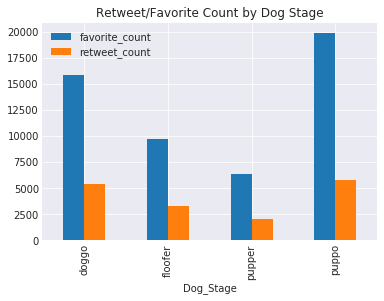

In [21]:
df_dog_stage.plot(y=["favorite_count", "retweet_count"], kind="bar", title='Retweet/Favorite Count by Dog Stage')